# Introduction to Python for data analysis


In [160]:
#Import Python Libraries
import pandas as pd


In [161]:
#Read csv file
df = pd.read_csv("./datasets/Salaries.csv")


In [162]:
df.head()


,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


### Exercise 
 - Try to read the first 10, 20, 50 records;
 - Can you guess how to view the last few records;              

In [163]:
df.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [164]:
df.tail(10)

,rank,discipline,phd,service,sex,salary
68,AsstProf,A,4,2,Female,77500
69,Prof,A,28,7,Female,116450
70,AsstProf,A,8,3,Female,78500
71,AssocProf,B,12,9,Female,71065
72,Prof,B,24,15,Female,161101
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954
77,Prof,A,23,15,Female,109646


### Data Frame data types

In [165]:
#Check a  column salary type
df["salary"].dtype

dtype('int64')

In [166]:
#Check types for all the columns
df.dtypes


rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

### Exercise 
Give the summary for the numeric columns in the dataset.
Calculate standard deviation for all numeric columns;
What are the mean values of the first 50 records in the dataset?   
Hint: use head() method to subset the first 50 records and then calculate the mean


In [167]:
df.head(50).describe()

,phd,service,salary
count,50.000000,50.000000,50.000000
mean,21.520000,17.600000,113789.140000
std,13.489588,13.385951,28886.605761
min,1.000000,0.000000,57800.000000
25%,11.250000,6.250000,91475.000000
50%,20.000000,18.000000,108907.500000
75%,29.000000,23.000000,133884.750000
max,56.000000,51.000000,186960.000000


### Exercise 
Calculate the basic statistics for the salary column;
Find how many values in the salary column (use count method);
Calculate the average salary;



In [168]:
# df["salary"].mean()

df["salary"].sum() / df["salary"].count()

108023.78205128205

### Exercise 
Return a random sample of size 10 from the dataframe 


In [169]:
df.sample(10)

,rank,discipline,phd,service,sex,salary
21,Prof,A,33,30,Male,103106
57,AsstProf,A,3,1,Female,72500
45,Prof,B,25,25,Female,140096
47,AssocProf,B,11,11,Female,103613
64,AssocProf,A,26,24,Female,73300
43,AsstProf,B,5,0,Female,77000
11,Prof,B,23,23,Male,134778
27,Prof,A,45,43,Male,155865
23,AsstProf,A,2,0,Male,85000
4,Prof,B,20,18,Male,104800


# Data Frames groupby method 
Using "group by" method we can:
 - Split the data into groups based on some criteria
 - Calculate statistics (or apply a function) to each group

Similar to `dplyr()` function in R


In [170]:
#Group data using rank
df_rank = df.groupby(["rank"]).sum()
df_rank

/tmp/ipykernel_1968/599007278.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rank = df.groupby(["rank"]).sum()


,phd,service,salary
rank,,,
AssocProf,196,147,1193221
AsstProf,96,42,1545893
Prof,1245,985,5686741


In [171]:
#Calculate mean value for each numeric column per each group
df.groupby(["rank"]).mean()


/tmp/ipykernel_1968/1091141467.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["rank"]).mean()


,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [172]:
#Calculate mean salary for each professor rank:
df[["rank", "salary"]].groupby("rank").mean()

,salary
rank,
AssocProf,91786.230769
AsstProf,81362.789474
Prof,123624.804348


### Data Frame: filtering

In [173]:
#Calculate mean salary for each professor rank:
df[["rank", "salary"]].groupby("rank").mean()


,salary
rank,
AssocProf,91786.230769
AsstProf,81362.789474
Prof,123624.804348


In [174]:
#Select only those rows that contain female professors:
# <your code here>
df_f = df.loc[df["sex"] == "Female"]
df_f

,rank,discipline,phd,service,sex,salary
39,Prof,B,18,18,Female,129000
40,Prof,A,39,36,Female,137000
41,AssocProf,A,13,8,Female,74830
42,AsstProf,B,4,2,Female,80225
43,AsstProf,B,5,0,Female,77000
44,Prof,B,23,19,Female,151768
45,Prof,B,25,25,Female,140096
46,AsstProf,B,11,3,Female,74692
47,AssocProf,B,11,11,Female,103613
48,Prof,B,17,17,Female,111512


### Data Frames: Slicing

In [175]:
#Select column salary as a Series:
# <your code here>
df["salary"]

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [176]:
#Select column salary as aSeries [another way!]:
# <your code here>
df.iloc[:,5]

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [177]:
#Select column salary as a dataframe:
# <your code here>
df.loc[:,["salary"]]

,salary
0,186960
1,93000
2,110515
3,131205
4,104800
...,...
73,105450
74,104542
75,124312
76,109954


In [178]:
#Select column salary:
df.loc[:,["rank", "salary"]]


,rank,salary
0,Prof,186960
1,Prof,93000
2,Prof,110515
3,Prof,131205
4,Prof,104800
...,...,...
73,Prof,105450
74,AssocProf,104542
75,Prof,124312
76,Prof,109954


In [179]:
#Select rows by their position:
# <your code here>
df.iloc[10:20,:]


,rank,discipline,phd,service,sex,salary
10,Prof,B,39,33,Male,128250
11,Prof,B,23,23,Male,134778
12,AsstProf,B,1,0,Male,88000
13,Prof,B,35,33,Male,162200
14,Prof,B,25,19,Male,153750
15,Prof,B,17,3,Male,150480
16,AsstProf,B,8,3,Male,75044
17,AsstProf,B,4,0,Male,92000
18,Prof,A,19,7,Male,107300
19,Prof,A,29,27,Male,150500


### Data Frames: method loc
If we need to select a range of rows, using their <B>labels</B> we can use method loc:


In [180]:
#Select rows by their labels:
# <your code here>
df.loc[10:20]

,rank,discipline,phd,service,sex,salary
10,Prof,B,39,33,Male,128250
11,Prof,B,23,23,Male,134778
12,AsstProf,B,1,0,Male,88000
13,Prof,B,35,33,Male,162200
14,Prof,B,25,19,Male,153750
15,Prof,B,17,3,Male,150480
16,AsstProf,B,8,3,Male,75044
17,AsstProf,B,4,0,Male,92000
18,Prof,A,19,7,Male,107300
19,Prof,A,29,27,Male,150500


### Data Frames: method iloc
If we need to select a range of rows and/or columns, using their <B>positions</B> we can use method iloc:


In [181]:
#Select rows by their labels:
# <your code here>

df.iloc[25:45]

,rank,discipline,phd,service,sex,salary
25,Prof,B,35,31,Male,99418
26,Prof,A,38,19,Male,148750
27,Prof,A,45,43,Male,155865
28,AsstProf,B,7,2,Male,91300
29,Prof,B,21,20,Male,123683
30,AssocProf,B,9,7,Male,107008
31,Prof,B,22,21,Male,155750
32,Prof,A,27,19,Male,103275
33,Prof,B,18,18,Male,120000
34,AssocProf,B,12,8,Male,119800


In [182]:
# First row of a data frame
df.iloc[0]

rank            Prof
discipline         B
phd               56
service           49
sex             Male
salary        186960
Name: 0, dtype: object

In [183]:
# Last row 
df.iloc[-1]

rank            Prof
discipline         A
phd               23
service           15
sex           Female
salary        109646
Name: 77, dtype: object

In [184]:
i= 11
# <your code here>  #(i+1)th row 
df.iloc[i+1]


rank          AsstProf
discipline           B
phd                  1
service              0
sex               Male
salary           88000
Name: 12, dtype: object

In [185]:
# <your code here>  # First column
df.iloc[:,0]


0          Prof
1          Prof
2          Prof
3          Prof
4          Prof
        ...    
73         Prof
74    AssocProf
75         Prof
76         Prof
77         Prof
Name: rank, Length: 78, dtype: object

In [186]:
# <your code here> # Last column 
df.iloc[:,-1]

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [187]:
# <your code here>       #First 7 rows 
df.iloc[:7,:]


,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285


In [188]:
# <your code here>    #First 2 columns
df.iloc[:,:2]

,rank,discipline
0,Prof,B
1,Prof,A
2,Prof,A
3,Prof,A
4,Prof,B
...,...,...
73,Prof,B
74,AssocProf,B
75,Prof,B
76,Prof,A


In [189]:
# <your code here>  #Second through third rows and first 2 columns
df.iloc[2:4,:2]

,rank,discipline
2,Prof,A
3,Prof,A


In [190]:
# <your code here>  #1st and 6th rows and 2nd and 4th columns


### Data Frames: Sorting

We can sort the data by a value in the column. By default the sorting will occur in ascending order and a new data frame is return. 


In [191]:
df_sorted = df.sort_values(by="salary")

In [192]:
# Create a new data frame from the original sorted by the column Salary
# <your code here>

df_sorted.head()


,rank,discipline,phd,service,sex,salary
9,Prof,A,51,51,Male,57800
54,AssocProf,A,25,22,Female,62884
66,AsstProf,A,7,6,Female,63100
71,AssocProf,B,12,9,Female,71065
57,AsstProf,A,3,1,Female,72500


In [193]:
df_sorted.tail()


,rank,discipline,phd,service,sex,salary
31,Prof,B,22,21,Male,155750
27,Prof,A,45,43,Male,155865
72,Prof,B,24,15,Female,161101
13,Prof,B,35,33,Male,162200
0,Prof,B,56,49,Male,186960


We can sort the data using 2 or more columns:


In [194]:
df_sorted = df.sort_values(by=["rank", "salary"], ascending=False)

In [195]:
# <your code here>


df_sorted.head(10)


,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
13,Prof,B,35,33,Male,162200
72,Prof,B,24,15,Female,161101
27,Prof,A,45,43,Male,155865
31,Prof,B,22,21,Male,155750
14,Prof,B,25,19,Male,153750
44,Prof,B,23,19,Female,151768
19,Prof,A,29,27,Male,150500
15,Prof,B,17,3,Male,150480
26,Prof,A,38,19,Male,148750


# Missing Values:

 - When summing the data, missing values will be treated as zero
 - If all values are missing, the sum will be equal to NaN
 - cumsum() and cumprod() methods ignore missing values but preserve them in the resulting arrays
 - Missing values in GroupBy method are excluded (just like in R)
 - Many descriptive statistics methods have skipna option to control if missing data should be excluded . This value is set to True by default (unlike R)


In [196]:
# Read a dataset flights.csv with missing values
flights = pd.read_csv("./datasets/flights.csv")

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160754 entries, 0 to 160753
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       160754 non-null  int64  
 1   month      160754 non-null  int64  
 2   day        160754 non-null  int64  
 3   dep_time   158418 non-null  float64
 4   dep_delay  158418 non-null  float64
 5   arr_time   158275 non-null  float64
 6   arr_delay  157927 non-null  float64
 7   carrier    160754 non-null  object 
 8   tailnum    159321 non-null  object 
 9   flight     160754 non-null  int64  
 10  origin     160754 non-null  object 
 11  dest       160754 non-null  object 
 12  air_time   157927 non-null  float64
 13  distance   160754 non-null  int64  
 14  hour       158418 non-null  float64
 15  minute     158418 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.6+ MB


In [197]:
# Select the rows that have at least one missing value
# <your code here>
flights[flights.isnull()]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Aggregation Functions in Pandas:

 - Aggregation - computing a summary statistic about each group, i.e.
                        >> compute group sums or means
                        >> compute group sizes/counts
                        
 - Common aggregation functions:

         >> `min`, `max`
         >> `count`, `sum`, `prod`
         >> `mean`, `median`, `mode`, `mad`
         >> `std`, `var`
 
`agg()` method are useful when multiple statistics are computed per column:




In [198]:
flights.agg(("min","max","mean"))

/tmp/ipykernel_1968/747573075.py:1: FutureWarning: ['carrier', 'tailnum', 'origin', 'dest'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  flights.agg(("min","max","mean"))


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,AA,1.000000,EWR,ANC,21.000000,17.00000,0.000000,0.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,US,2599.000000,LGA,TPA,695.000000,4963.00000,24.000000,59.000000
mean,2013.0,6.547395,15.716567,1316.146006,9.463773,1517.471161,2.094537,NaN,1156.344987,NaN,NaN,180.685158,1282.44542,12.837582,32.387847


### Basic Descriptive Statistics

In [199]:
flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,160754.0,160754.000000,160754.000000,158418.000000,158418.000000,158275.000000,157927.000000,160754.000000,157927.000000,160754.000000,158418.000000,158418.000000
mean,2013.0,6.547395,15.716567,1316.146006,9.463773,1517.471161,2.094537,1156.344987,180.685158,1282.445420,12.837582,32.387847
std,0.0,3.410001,8.762794,470.823715,36.545109,510.695413,41.479349,695.884283,97.507866,765.895383,4.725552,18.687423
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,1.000000,21.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,855.000000,-5.000000,1112.000000,-19.000000,504.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1345.000000,-2.000000,1541.000000,-7.000000,1157.000000,153.000000,1076.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1725.000000,7.000000,1944.000000,9.000000,1715.000000,258.000000,1728.000000,17.000000,51.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,2599.000000,695.000000,4963.000000,24.000000,59.000000


In [200]:
flights.var()

/tmp/ipykernel_1968/1740998846.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flights.var()


year              0.000000
month            11.628109
day              76.786554
dep_time     221674.970217
dep_delay      1335.545015
arr_time     260809.805345
arr_delay      1720.536369
flight       484254.935545
air_time       9507.783908
distance     586595.738217
hour             22.330842
minute          349.219793
dtype: float64

### Graphics to explore the data

`.plot()` has several optional parameters. Most notably, the kind parameter accepts eleven different string values and determines which kind of plot you’ll create:

 - "area" is for area plots.
 - "bar" is for vertical bar charts.
 - "barh" is for horizontal bar charts.
 - "box" is for box plots.
 - "hexbin" is for hexbin plots.
 - "hist" is for histograms.
 - "kde" is for kernel density estimate charts.
 - "density" is an alias for "kde".
 - "line" is for line graphs.
 - "pie" is for pie charts.
 - "scatter" is for scatter plots.

In [201]:
flights

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160749,2013,9,30,2105.0,-1.0,2329.0,-25.0,UA,N477UA,475,EWR,IAH,175.0,1400,21.0,5.0
160750,2013,9,30,2121.0,21.0,2349.0,-25.0,DL,N193DN,2363,JFK,LAX,296.0,2475,21.0,21.0
160751,2013,9,30,2140.0,0.0,10.0,-30.0,AA,N335AA,185,JFK,LAX,298.0,2475,21.0,40.0
160752,2013,9,30,2149.0,-7.0,2245.0,-23.0,UA,N813UA,523,EWR,BOS,37.0,200,21.0,49.0


<AxesSubplot: title={'center': 'arr_delay'}, xlabel='[carrier]'>

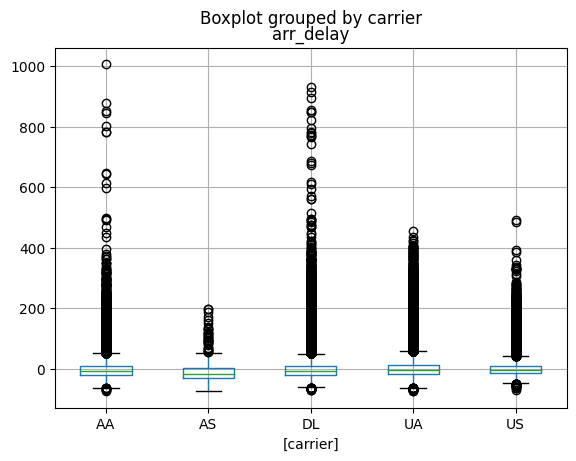

In [202]:
# Create a boxplot for arr_delay per carrier
flights.loc[:,["arr_delay", "carrier"]].boxplot(by="carrier")


In [203]:
median_column = flights["dep_delay"]

<AxesSubplot: >

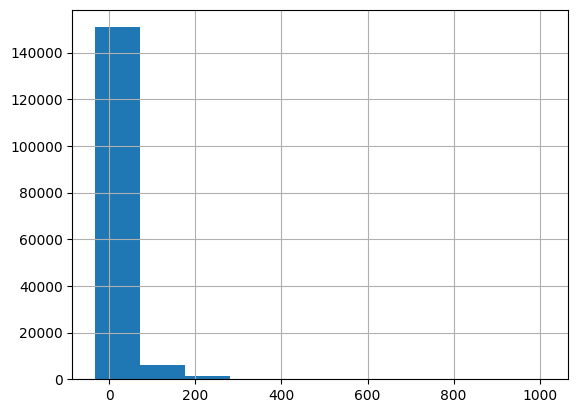

In [204]:
#create a histogram for the "dep_delay" column
median_column.hist()


<AxesSubplot: ylabel='Frequency'>

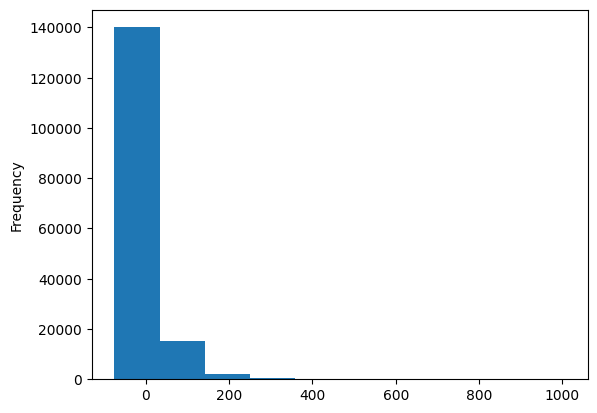

In [205]:
flights['arr_delay'].plot(kind="hist")